<a href="https://colab.research.google.com/github/SaiMohanBatta/project/blob/main/220658141.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as EPandas
Early_Diabet = '/content/drive/MyDrive/diabetes_prediction_dataset.csv'

Early_Prediction = EPandas.read_csv(Early_Diabet)
Early_Prediction

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
Early_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [ ]:
Early_Prediction.select_dtypes(include=['object']).columns

Index(['gender', 'smoking_history'], dtype='object')

Diabetic Categories of Original Data:
 diabetes
0    91500
1     8500
Name: count, dtype: int64


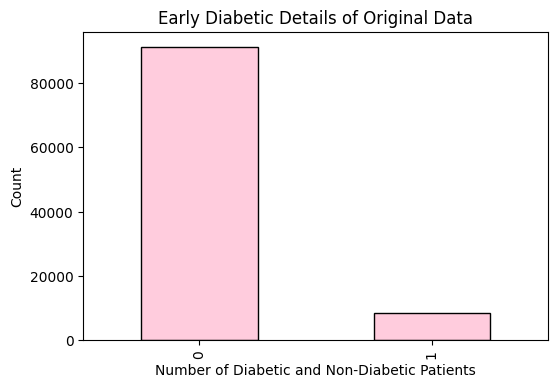

In [ ]:
import seaborn as EarlySborn
import matplotlib.pyplot as EarlyPlot

print("Diabetic Categories of Original Data:\n",Early_Prediction['diabetes'].value_counts())

EarlyPlot.figure(figsize=(6, 4))
Early_Prediction['diabetes'].value_counts().plot(kind='bar', color='#ffccdd', edgecolor='black')
EarlyPlot.title('Early Diabetic Details of Original Data')
EarlyPlot.xlabel('Number of Diabetic and Non-Diabetic Patients')
EarlyPlot.ylabel('Count')
EarlyPlot.show()

In [ ]:
Early_Prediction.shape

(100000, 9)

In [ ]:
del Early_Prediction['gender']    ### Deleted unwanted feature from the data frame
Early_Prediction.isnull().values.sum()  #### Find the Null from Diabetic data

0

In [ ]:
print("Total Duplicates of Early Diabetics Data: ",Early_Prediction.duplicated().sum())
Early_Prediction = Early_Prediction.drop_duplicates()
print("Early Diabetic Data shape after deleted the duplicates: ",Early_Prediction.shape)

Total Duplicates of Early Diabetics Data:  6389
Early Diabetic Data shape after deleted the duplicates:  (93611, 8)


Diabetic Categories of Processed Data:
 diabetes
0    85141
1     8470
Name: count, dtype: int64


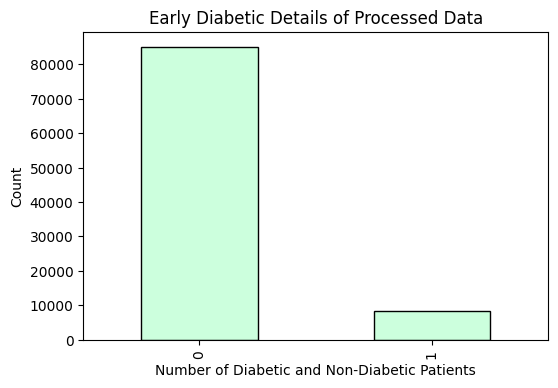

In [ ]:
print("Diabetic Categories of Processed Data:\n",Early_Prediction['diabetes'].value_counts())

EarlyPlot.figure(figsize=(6, 4))
Early_Prediction['diabetes'].value_counts().plot(kind='bar', color='#ccffdd', edgecolor='black')
EarlyPlot.title('Early Diabetic Details of Processed Data')
EarlyPlot.xlabel('Number of Diabetic and Non-Diabetic Patients')
EarlyPlot.ylabel('Count')
EarlyPlot.show()

Text(0.5, 1.0, 'Distribution of BMI')

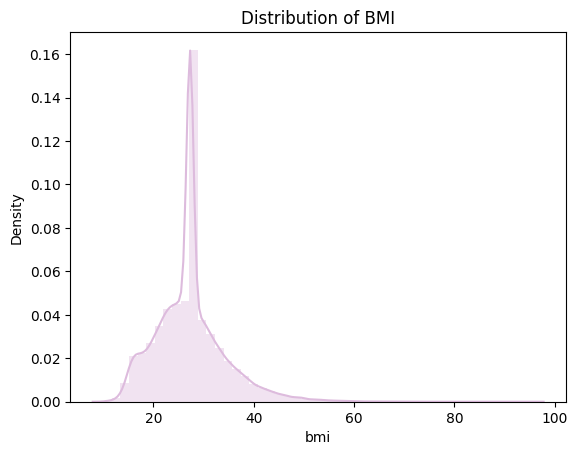

In [ ]:
import warnings as wr_EarlyDiabet
wr_EarlyDiabet.filterwarnings("ignore")

EarlySborn.distplot(Early_Prediction['bmi'], color ='#ddbbdd')
EarlyPlot.title('Distribution of BMI')

In [ ]:
from sklearn import preprocessing as EarlyProcess
from collections import Counter as CNT_EarlyDiabet
from imblearn.over_sampling import SMOTE as SMT_EarlyDiabet

Early_ObNum = EarlyProcess.LabelEncoder()
Early_Prediction['smoking_history']= Early_ObNum.fit_transform(Early_Prediction['smoking_history'])

X_EarlyDiabet = Early_Prediction.drop('diabetes',axis=1)
y_EarlyDiabet = Early_Prediction['diabetes']

print('Labels of Early Diabetic  %s' % CNT_EarlyDiabet(y_EarlyDiabet))
Mdl_EarlyDiabet = SMT_EarlyDiabet()
X_EarlyDiabet, y_EarlyDiabet = Mdl_EarlyDiabet.fit_resample(X_EarlyDiabet, y_EarlyDiabet)
print('Balanced Labels of Early Diabetic %s' % CNT_EarlyDiabet(y_EarlyDiabet))
Early_Prediction = EPandas.concat([X_EarlyDiabet, y_EarlyDiabet], axis=1)

print("\nEarly Diabetic Data Shape after Balancing: ",Early_Prediction.shape)
Early_Prediction['diabetes'].value_counts()

Labels of Early Diabetic  Counter({0: 85141, 1: 8470})
Balanced Labels of Early Diabetic Counter({0: 85141, 1: 85141})

Early Diabetic Data Shape after Balancing:  (170282, 8)


,count
diabetes,
0,85141
1,85141


In [ ]:
Early_Prediction.to_csv('EarlyPredictions_Diabetic.csv', index=False)
Early_Prediction.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
Early_Prediction.tail()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
170277,42.420517,0,0,4,19.595471,8.200000,200,1
170278,80.000000,0,1,3,24.520806,6.377481,145,1
170279,63.660241,0,0,4,56.673469,7.392290,200,1
170280,79.000000,0,0,3,28.109027,6.600000,300,1
170281,79.674031,0,0,4,34.966958,7.500000,260,1


In [ ]:
Early_Prediction.shape

(170282, 8)

In [ ]:
import pandas as EPandas
Early_Diabet = '/content/EarlyPredictions_Diabetic.csv'

Early_Prediction = EPandas.read_csv(Early_Diabet)
Early_Prediction

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.000000,0,1,4,25.190000,6.600000,140,0
1,54.000000,0,0,0,27.320000,6.600000,80,0
2,28.000000,0,0,4,27.320000,5.700000,158,0
3,36.000000,0,0,1,23.450000,5.000000,155,0
4,76.000000,1,1,1,20.140000,4.800000,155,0
...,...,...,...,...,...,...,...,...
170277,42.420517,0,0,4,19.595471,8.200000,200,1
170278,80.000000,0,1,3,24.520806,6.377481,145,1
170279,63.660241,0,0,4,56.673469,7.392290,200,1
170280,79.000000,0,0,3,28.109027,6.600000,300,1


In [ ]:
####====Splitting with 60% training, 20% testing, 20% validation

In [ ]:
from sklearn.model_selection import train_test_split as E_AttTSpl
X_EarlyDiabet = Early_Prediction.drop('diabetes',axis=1)
y_EarlyDiabet = Early_Prediction['diabetes']
Xt_EarlyDiabet, Xs_EarlyDiabet, yt_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(X_EarlyDiabet,y_EarlyDiabet,test_size=0.4,random_state= 11)
Xv_EarlyDiabet, Xs_EarlyDiabet, yv_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(Xs_EarlyDiabet,ys_EarlyDiabet,test_size=0.5,random_state= 11)

In [ ]:
print("\nEarly Diabetics Training : ",Xt_EarlyDiabet.shape)
Xt_EarlyDiabet


Early Diabetics Training :  (102169, 7)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
137377,25.993327,0,0,5,22.223237,8.990657,140
158586,63.000000,0,0,0,38.405784,6.541757,126
62641,45.000000,1,0,3,53.000000,6.100000,155
37777,13.000000,0,0,0,31.210000,6.500000,145
1647,21.000000,0,0,0,25.330000,6.100000,100
...,...,...,...,...,...,...,...
102327,47.573190,0,0,4,37.260740,7.818338,159
97617,80.000000,0,0,4,27.880101,6.823677,300
21584,70.000000,0,0,4,25.100000,6.600000,85
36543,39.000000,0,0,2,26.910000,6.600000,85


In [ ]:
print("Early Diabetics Testing : ",Xs_EarlyDiabet.shape)
Xs_EarlyDiabet

Early Diabetics Testing :  (34057, 7)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
52255,42.000000,0,0,4,25.380000,5.000000,130
22849,80.000000,0,0,3,29.370000,6.100000,158
143131,70.582281,0,0,0,40.310513,6.450631,159
58807,53.000000,0,0,0,27.320000,6.000000,100
36080,39.000000,0,0,5,22.380000,4.000000,100
...,...,...,...,...,...,...,...
98197,75.293821,0,0,4,37.536242,6.822698,145
151714,61.181991,1,0,0,35.870786,8.472225,126
130492,60.544297,0,0,3,27.842525,8.183554,280
18501,50.000000,1,0,0,30.230000,6.500000,140


In [ ]:
print("Early Diabetics Validation : ",Xv_EarlyDiabet.shape)
Xv_EarlyDiabet

Early Diabetics Validation :  (34056, 7)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
50604,47.000000,0,0,3,37.980000,6.100000,100
36085,1.560000,0,0,0,18.620000,6.000000,159
92001,67.000000,0,1,0,24.680000,3.500000,145
42277,37.000000,0,0,4,32.370000,3.500000,160
117601,63.858403,1,0,3,37.331499,6.113278,300
...,...,...,...,...,...,...,...
104785,80.000000,0,0,0,26.249830,6.000000,159
103298,65.000000,0,0,4,33.136186,6.376313,130
53134,80.000000,0,0,3,18.300000,3.500000,160
29187,12.000000,0,0,4,17.180000,6.200000,155


In [ ]:
from sklearn.model_selection import GridSearchCV as EarlyGrid
import warnings as wr_EarlyDiabet
wr_EarlyDiabet.filterwarnings("ignore")
from sklearn import metrics as EarlyMet
from sklearn.metrics import confusion_matrix as EarlyMatx
from sklearn.metrics import ConfusionMatrixDisplay as EarlyMatxdis
from sklearn.metrics import classification_report as EarlyCre
import matplotlib.pyplot as EarlyPlot
from sklearn.ensemble import GradientBoostingClassifier as EarlyGBCL
from sklearn.naive_bayes import GaussianNB as EarlyGNB
from sklearn.naive_bayes import BernoulliNB as EarlyBNB
from sklearn.ensemble import RandomForestClassifier as EarlyRFC
from sklearn.ensemble import ExtraTreesClassifier as EarlyETC
from sklearn.ensemble import AdaBoostClassifier as EarlyABC

# Naive Bayes variants

## Gaussian nb


In [ ]:
Early_DiabetP = { 'priors':[None, 1.0, 2.0],'var_smoothing': [1e-09, 1e-03, 1e-06]}
Mdl_EarlyDiabet = EarlyGNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'priors': None, 'var_smoothing': 1e-06}


GaussianNB(var_smoothing=1e-06)

In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

NameError: name 'Mdl_EarlyDiabet' is not defined

              precision    recall  f1-score   support

           0       0.83      0.87      0.85     16983
           1       0.87      0.83      0.85     17074

    accuracy                           0.85     34057
   macro avg       0.85      0.85      0.85     34057
weighted avg       0.85      0.85      0.85     34057



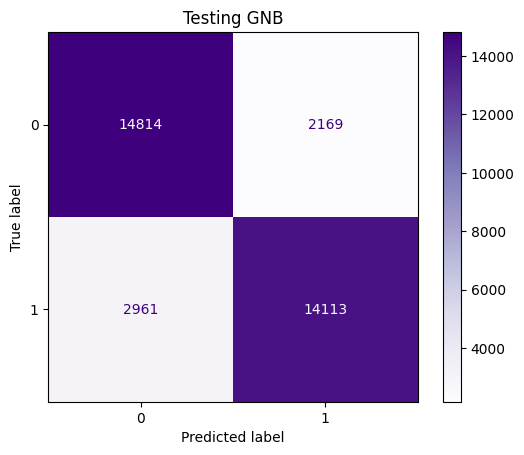

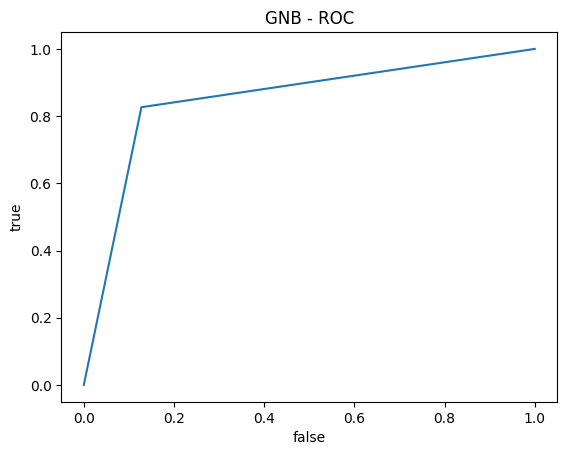


GNB - AUC: 0.8494312360441804


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

## Bernoulli NB


In [ ]:
Early_DiabetP = { 'alpha':[1.0, 0.01, 0.08],'force_alpha': [True, False]}
Mdl_EarlyDiabet = EarlyBNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyBNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'alpha': 0.01, 'force_alpha': True}


BernoulliNB(alpha=0.01)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45     16975
           1       0.55      0.81      0.66     17081

    accuracy                           0.58     34056
   macro avg       0.60      0.58      0.55     34056
weighted avg       0.60      0.58      0.55     34056



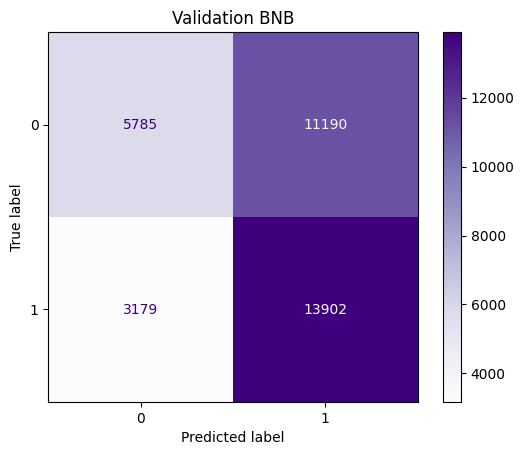

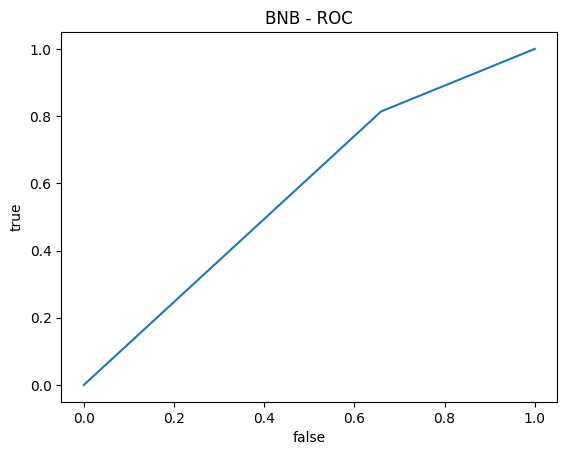


BNB - AUC: 0.5773410309830169


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45     16983
           1       0.55      0.82      0.66     17074

    accuracy                           0.58     34057
   macro avg       0.60      0.58      0.55     34057
weighted avg       0.60      0.58      0.55     34057



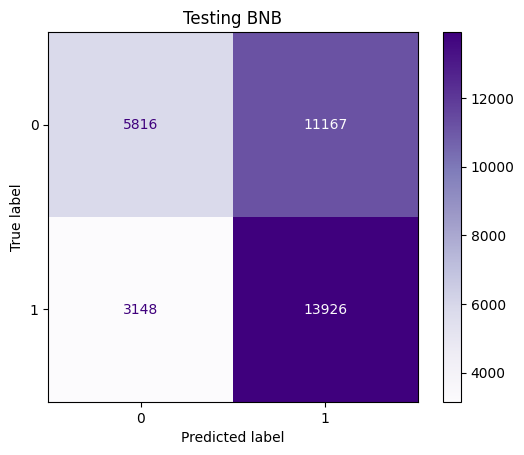

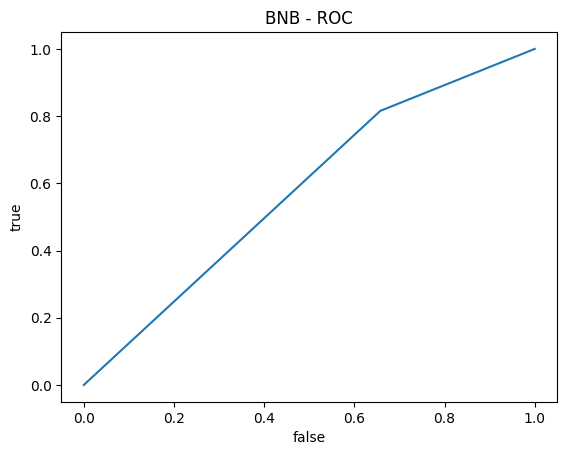


BNB - AUC: 0.5790431026634679


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

## Tree Based models


## Random forest


In [ ]:
Early_DiabetP = { 'max_depth':[1, 2, 3],'criterion': ['gini','entropy','log_loss'],'bootstrap':[True,False]}
Mdl_EarlyDiabet = EarlyRFC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyRFC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 3}


RandomForestClassifier(bootstrap=False, max_depth=3)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16975
           1       0.93      0.86      0.89     17081

    accuracy                           0.90     34056
   macro avg       0.90      0.90      0.90     34056
weighted avg       0.90      0.90      0.90     34056



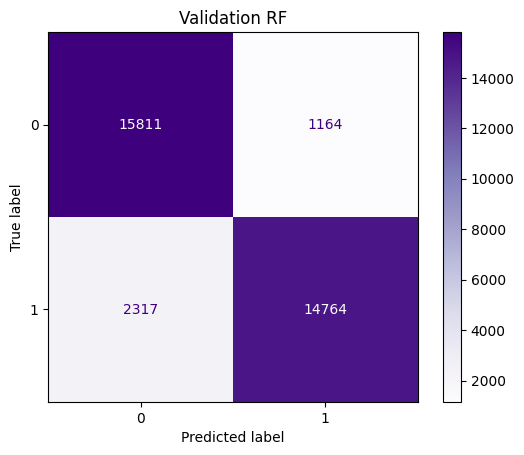

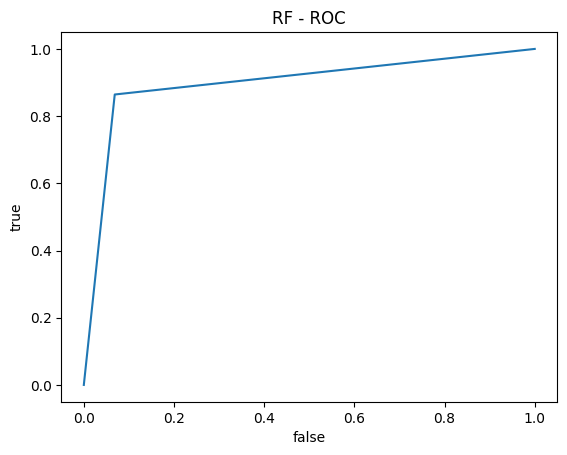


RF - AUC: 0.8978903878160361


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('RF - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     16983
           1       0.93      0.86      0.89     17074

    accuracy                           0.90     34057
   macro avg       0.90      0.90      0.90     34057
weighted avg       0.90      0.90      0.90     34057



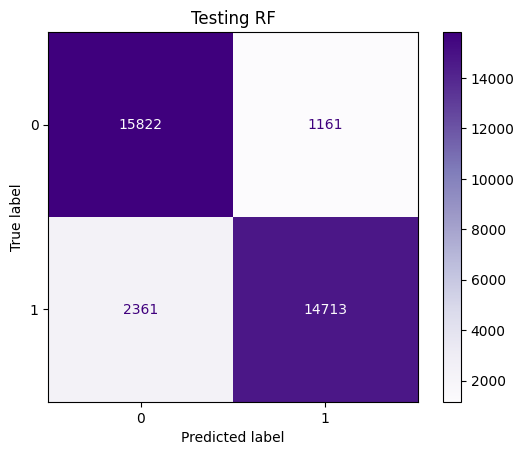

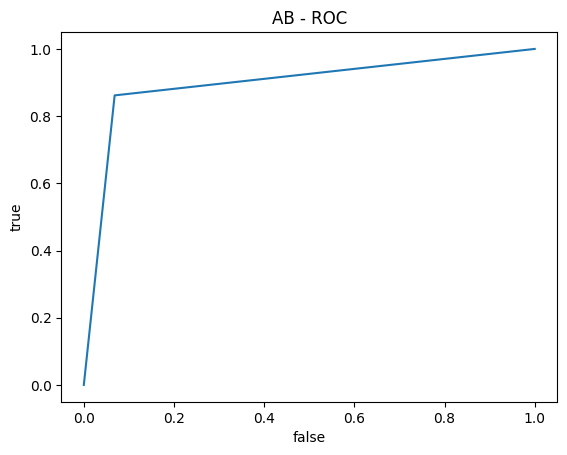


RF - AUC: 0.896678546746762


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

## Extra Trees


In [ ]:
Early_DiabetP = {'criterion':['gini','log_loss', 'entropy'],'max_depth': [1, 2, 3]}
Mdl_EarlyDiabet = EarlyETC(random_state=7)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyETC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'criterion': 'log_loss', 'max_depth': 3}


ExtraTreesClassifier(criterion='log_loss', max_depth=3)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     16975
           1       0.88      0.92      0.90     17081

    accuracy                           0.89     34056
   macro avg       0.89      0.89      0.89     34056
weighted avg       0.89      0.89      0.89     34056



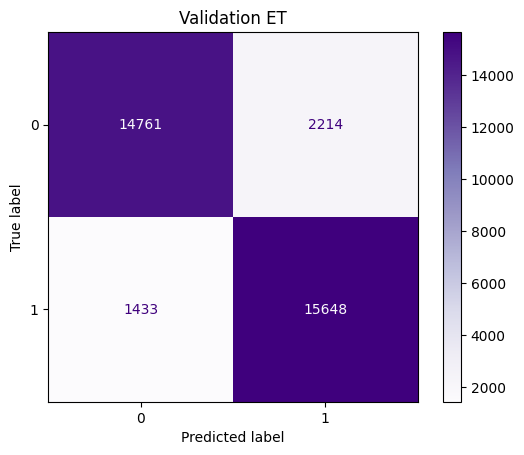

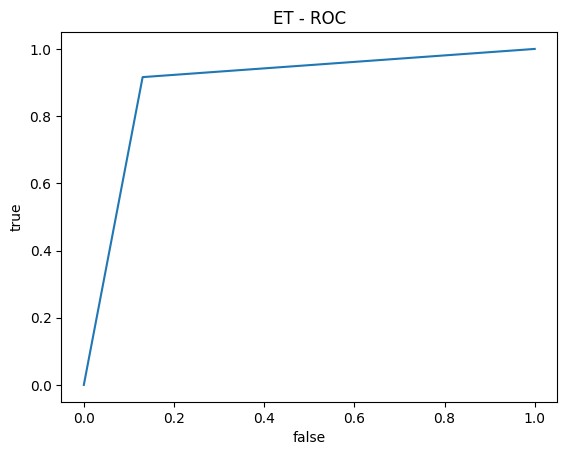


ET - AUC: 0.8928392578754318


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89     16983
           1       0.88      0.91      0.90     17074

    accuracy                           0.89     34057
   macro avg       0.89      0.89      0.89     34057
weighted avg       0.89      0.89      0.89     34057



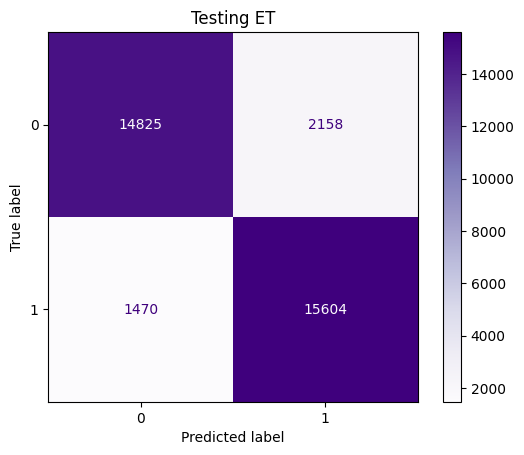

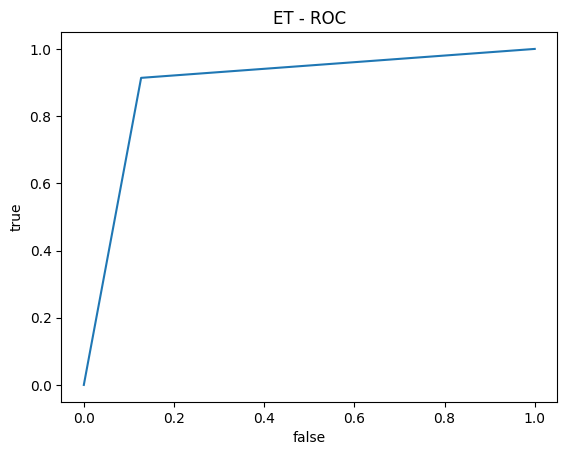


ET - AUC: 0.8934179685407904


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

## Boosting Models


## Gradient Boost


In [ ]:
Early_DiabetP = { 'loss':['log_loss', 'exponential'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyGBCL(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGBCL(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 140}


GradientBoostingClassifier(learning_rate=1.0, loss='exponential',
                           n_estimators=140)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16975
           1       0.99      0.96      0.98     17081

    accuracy                           0.98     34056
   macro avg       0.98      0.98      0.98     34056
weighted avg       0.98      0.98      0.98     34056



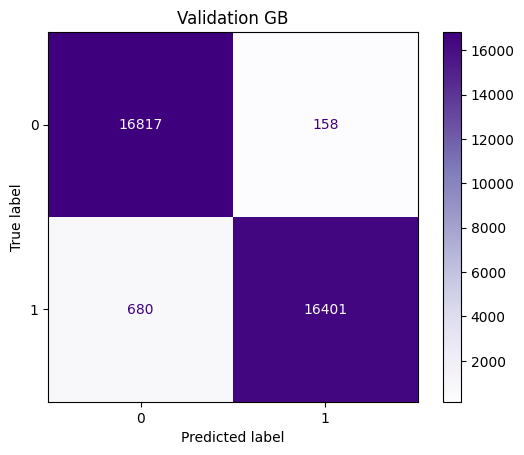

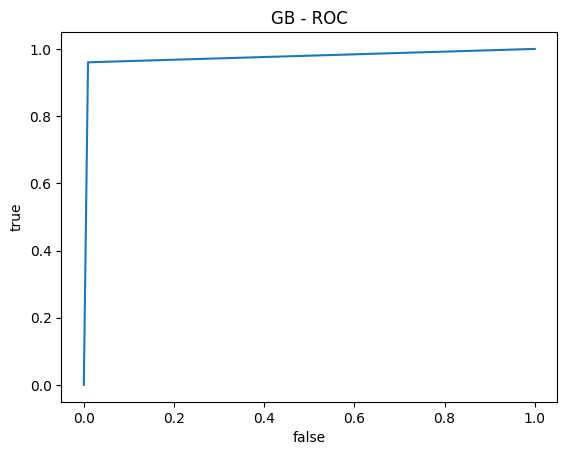


GB - AUC: 0.9754409394241197


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation GB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nGB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     16983
           1       0.99      0.96      0.97     17074

    accuracy                           0.98     34057
   macro avg       0.98      0.98      0.98     34057
weighted avg       0.98      0.98      0.98     34057



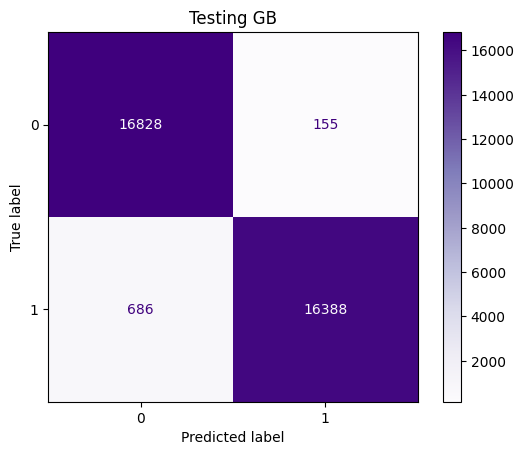

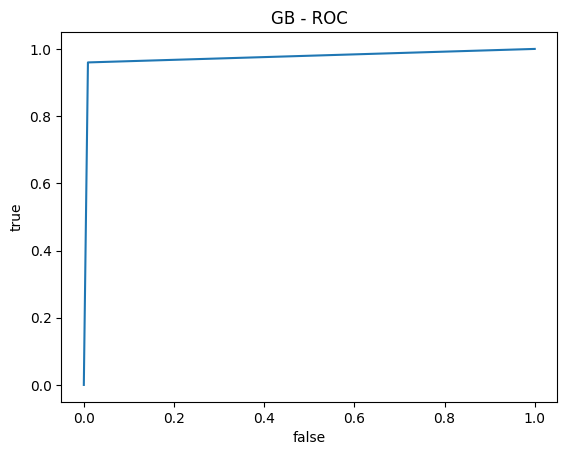


GB - AUC: 0.9753475888362784


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGB - AUC:", A_Diabet)

## Ada boost


In [ ]:
Early_DiabetP = { 'algorithm':['SAMME', 'SAMME.R'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyABC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet.sample(1100, random_state=11), yt_EarlyDiabet.sample(1100, random_state=11))
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyABC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}


AdaBoostClassifier(n_estimators=100)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     16975
           1       0.98      0.95      0.96     17081

    accuracy                           0.97     34056
   macro avg       0.97      0.97      0.97     34056
weighted avg       0.97      0.97      0.97     34056



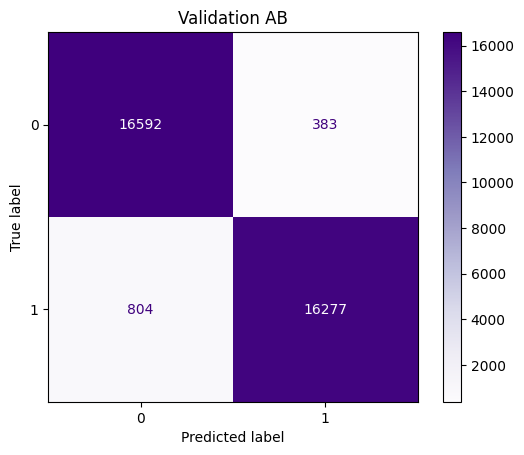

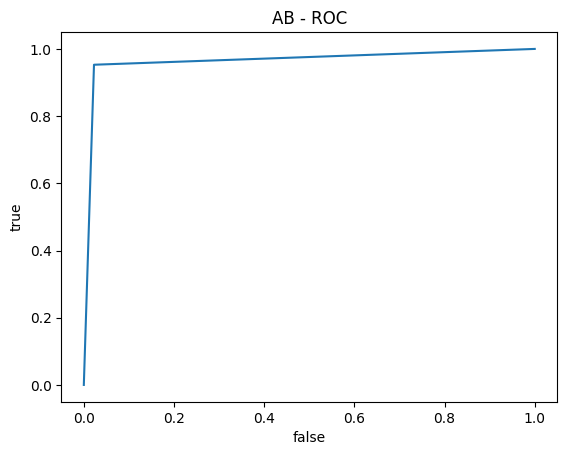


AB - AUC: 0.9651837821334524


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     16983
           1       0.98      0.95      0.96     17074

    accuracy                           0.96     34057
   macro avg       0.96      0.96      0.96     34057
weighted avg       0.96      0.96      0.96     34057



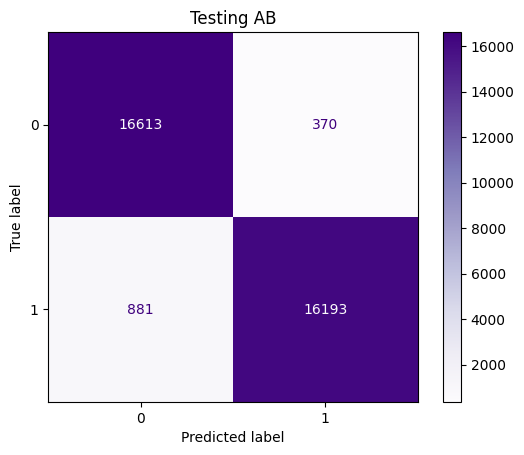

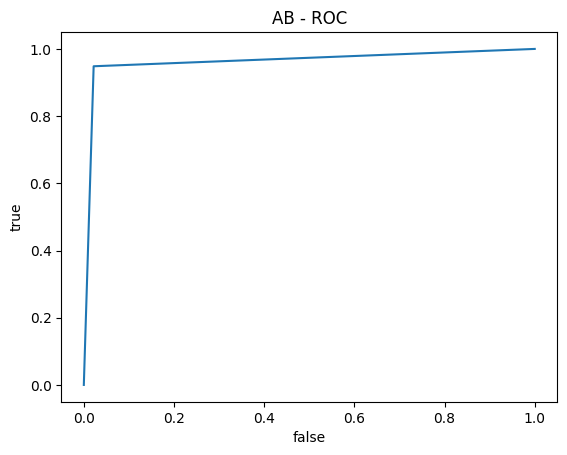


AB - AUC: 0.9633072926436073


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)

In [ ]:
import pandas as EPandas
Early_Diabet = 'EarlyPredictions_Diabetic.csv'

Early_Prediction = EPandas.read_csv(Early_Diabet)
Early_Prediction

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.000000,0,1,4,25.190000,6.600000,140,0
1,54.000000,0,0,0,27.320000,6.600000,80,0
2,28.000000,0,0,4,27.320000,5.700000,158,0
3,36.000000,0,0,1,23.450000,5.000000,155,0
4,76.000000,1,1,1,20.140000,4.800000,155,0
...,...,...,...,...,...,...,...,...
170277,42.420517,0,0,4,19.595471,8.200000,200,1
170278,80.000000,0,1,3,24.520806,6.377481,145,1
170279,63.660241,0,0,4,56.673469,7.392290,200,1
170280,79.000000,0,0,3,28.109027,6.600000,300,1


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

X_diabet = Early_Prediction.drop('diabetes',axis=1)
y_EarlyDiabet = Early_Prediction['diabetes']

#$$$$ Initialize PolynomialFeatures
Diabet_poly = PolynomialFeatures(degree=2, include_bias=False)

#$$$$ Transform the features to include polynomial features
X_EarlyDiabet = Diabet_poly.fit_transform(X_diabet)

#$$$$$ Convert the transformed features into a DataFrame for easy viewing
Early_Prediction = EPandas.DataFrame(X_EarlyDiabet, columns=Diabet_poly.get_feature_names_out(X_diabet.columns))

print("Polynomial Features Shape: ",X_EarlyDiabet.shape)
Early_Prediction.head()

Polynomial Features Shape:  (170282, 35)


,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,age^2,age hypertension,age heart_disease,...,smoking_history^2,smoking_history bmi,smoking_history HbA1c_level,smoking_history blood_glucose_level,bmi^2,bmi HbA1c_level,bmi blood_glucose_level,HbA1c_level^2,HbA1c_level blood_glucose_level,blood_glucose_level^2
0,80.0,0.0,1.0,4.0,25.19,6.6,140.0,6400.0,0.0,80.0,...,16.0,100.76,26.4,560.0,634.5361,166.254,3526.60,43.56,924.0,19600.0
1,54.0,0.0,0.0,0.0,27.32,6.6,80.0,2916.0,0.0,0.0,...,0.0,0.00,0.0,0.0,746.3824,180.312,2185.60,43.56,528.0,6400.0
2,28.0,0.0,0.0,4.0,27.32,5.7,158.0,784.0,0.0,0.0,...,16.0,109.28,22.8,632.0,746.3824,155.724,4316.56,32.49,900.6,24964.0
3,36.0,0.0,0.0,1.0,23.45,5.0,155.0,1296.0,0.0,0.0,...,1.0,23.45,5.0,155.0,549.9025,117.250,3634.75,25.00,775.0,24025.0
4,76.0,1.0,1.0,1.0,20.14,4.8,155.0,5776.0,76.0,76.0,...,1.0,20.14,4.8,155.0,405.6196,96.672,3121.70,23.04,744.0,24025.0


In [ ]:
Early_Prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170282 entries, 0 to 170281
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   age                                  170282 non-null  float64
 1   hypertension                         170282 non-null  float64
 2   heart_disease                        170282 non-null  float64
 3   smoking_history                      170282 non-null  float64
 4   bmi                                  170282 non-null  float64
 5   HbA1c_level                          170282 non-null  float64
 6   blood_glucose_level                  170282 non-null  float64
 7   age^2                                170282 non-null  float64
 8   age hypertension                     170282 non-null  float64
 9   age heart_disease                    170282 non-null  float64
 10  age smoking_history                  170282 non-null  float64
 11  age bmi      

In [ ]:
from sklearn.model_selection import train_test_split as E_AttTSpl
Xt_EarlyDiabet, Xs_EarlyDiabet, yt_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(X_EarlyDiabet,y_EarlyDiabet,test_size=0.4,random_state= 11)
Xv_EarlyDiabet, Xs_EarlyDiabet, yv_EarlyDiabet, ys_EarlyDiabet = E_AttTSpl(Xs_EarlyDiabet,ys_EarlyDiabet,test_size=0.5,random_state= 11)

In [ ]:
print("\nEarly Diabetics Training : ",Xt_EarlyDiabet.shape)
Xt_EarlyDiabet


Early Diabetics Training :  (102169, 35)


array([[2.59933265e+01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08319159e+01, 1.25869200e+03, 1.96000000e+04],
       [6.30000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.27945845e+01, 8.24261381e+02, 1.58760000e+04],
       [4.50000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        3.72100000e+01, 9.45500000e+02, 2.40250000e+04],
       ...,
       [7.00000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 5.61000000e+02, 7.22500000e+03],
       [3.90000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 5.61000000e+02, 7.22500000e+03],
       [4.97501292e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.82009938e+01, 1.07359061e+03, 1.69000000e+04]])

In [ ]:
print("Early Diabetics Testing : ",Xs_EarlyDiabet.shape)
Xs_EarlyDiabet

Early Diabetics Testing :  (34057, 35)


array([[4.20000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        2.50000000e+01, 6.50000000e+02, 1.69000000e+04],
       [8.00000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        3.72100000e+01, 9.63800000e+02, 2.49640000e+04],
       [7.05822810e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.16106454e+01, 1.02565039e+03, 2.52810000e+04],
       ...,
       [6.05442970e+01, 0.00000000e+00, 0.00000000e+00, ...,
        6.69705639e+01, 2.29139525e+03, 7.84000000e+04],
       [5.00000000e+01, 1.00000000e+00, 0.00000000e+00, ...,
        4.22500000e+01, 9.10000000e+02, 1.96000000e+04],
       [4.10000000e+01, 0.00000000e+00, 0.00000000e+00, ...,
        4.35600000e+01, 1.04280000e+03, 2.49640000e+04]])

In [ ]:
print("Early Diabetics Validation : ",Xv_EarlyDiabet.shape)
Xv_EarlyDiabet

Early Diabetics Validation :  (34056, 35)


array([[4.7000e+01, 0.0000e+00, 0.0000e+00, ..., 3.7210e+01, 6.1000e+02,
        1.0000e+04],
       [1.5600e+00, 0.0000e+00, 0.0000e+00, ..., 3.6000e+01, 9.5400e+02,
        2.5281e+04],
       [6.7000e+01, 0.0000e+00, 1.0000e+00, ..., 1.2250e+01, 5.0750e+02,
        2.1025e+04],
       ...,
       [8.0000e+01, 0.0000e+00, 0.0000e+00, ..., 1.2250e+01, 5.6000e+02,
        2.5600e+04],
       [1.2000e+01, 0.0000e+00, 0.0000e+00, ..., 3.8440e+01, 9.6100e+02,
        2.4025e+04],
       [7.9000e+01, 1.0000e+00, 1.0000e+00, ..., 4.9000e+01, 1.8200e+03,
        6.7600e+04]])

In [ ]:
from sklearn.model_selection import GridSearchCV as EarlyGrid
import warnings as wr_EarlyDiabet
wr_EarlyDiabet.filterwarnings("ignore")
from sklearn import metrics as EarlyMet
from sklearn.metrics import confusion_matrix as EarlyMatx
from sklearn.metrics import ConfusionMatrixDisplay as EarlyMatxdis
from sklearn.metrics import classification_report as EarlyCre
import matplotlib.pyplot as EarlyPlot
from sklearn.ensemble import GradientBoostingClassifier as EarlyGBCL
from sklearn.naive_bayes import GaussianNB as EarlyGNB
from sklearn.naive_bayes import BernoulliNB as EarlyBNB
from sklearn.ensemble import RandomForestClassifier as EarlyRFC
from sklearn.ensemble import ExtraTreesClassifier as EarlyETC
from sklearn.ensemble import AdaBoostClassifier as EarlyABC

In [ ]:
Early_DiabetP = { 'priors':[None, 1.0, 2.0],'var_smoothing': [1e-09, 1e-03, 1e-06]}
Mdl_EarlyDiabet = EarlyGNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'priors': None, 'var_smoothing': 1e-06}


GaussianNB(var_smoothing=1e-06)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84     16975
           1       0.87      0.78      0.82     17081

    accuracy                           0.83     34056
   macro avg       0.83      0.83      0.83     34056
weighted avg       0.83      0.83      0.83     34056



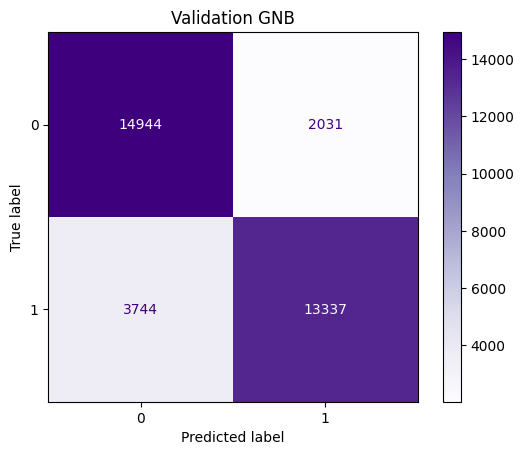

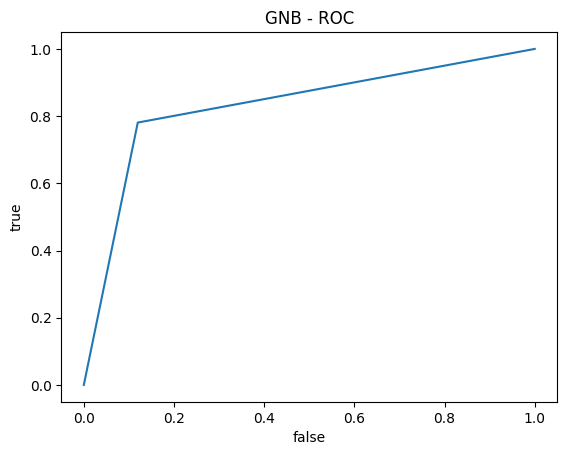


GNB - AUC: 0.8305812735455487


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     16983
           1       0.87      0.78      0.83     17074

    accuracy                           0.83     34057
   macro avg       0.84      0.83      0.83     34057
weighted avg       0.84      0.83      0.83     34057



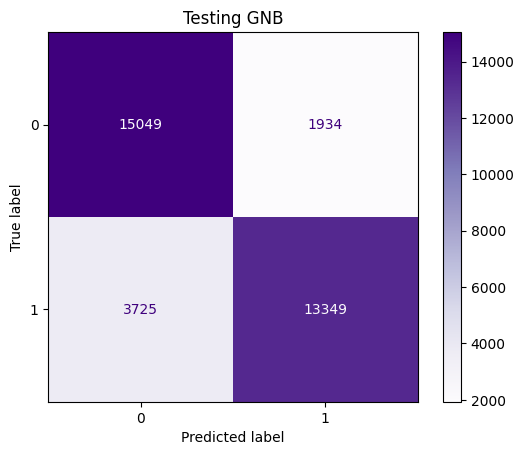

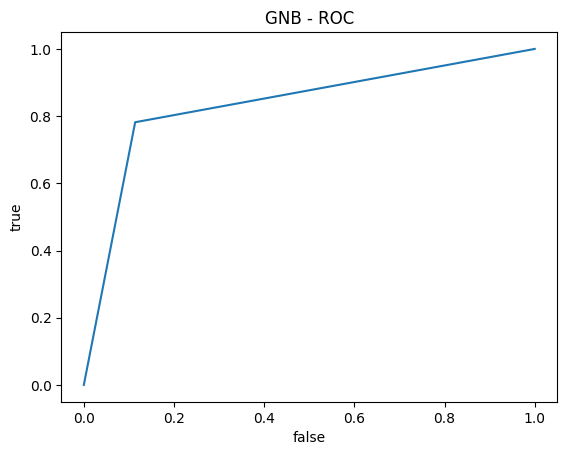


GNB - AUC: 0.8339767204174042


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGNB - AUC:", A_Diabet)

In [ ]:
Early_DiabetP = { 'alpha':[1.0, 0.01, 0.08],'force_alpha': [True, False]}
Mdl_EarlyDiabet = EarlyBNB()
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyBNB(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'alpha': 1.0, 'force_alpha': True}


BernoulliNB()

              precision    recall  f1-score   support

           0       0.65      0.34      0.45     16975
           1       0.55      0.81      0.66     17081

    accuracy                           0.58     34056
   macro avg       0.60      0.58      0.55     34056
weighted avg       0.60      0.58      0.55     34056



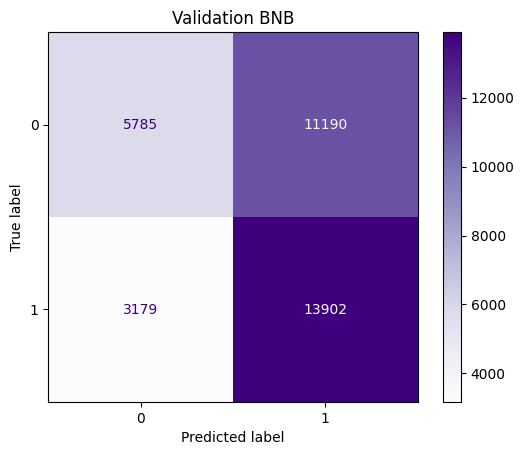

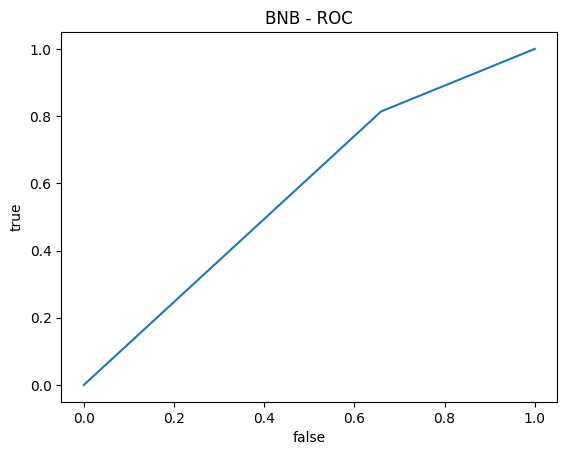


BNB - AUC: 0.5773410309830169


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.65      0.34      0.45     16983
           1       0.55      0.82      0.66     17074

    accuracy                           0.58     34057
   macro avg       0.60      0.58      0.55     34057
weighted avg       0.60      0.58      0.55     34057



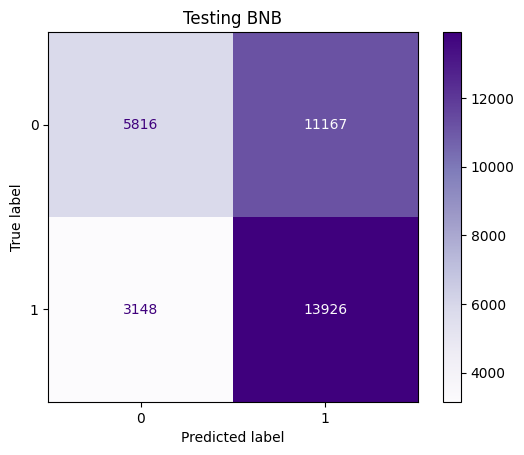

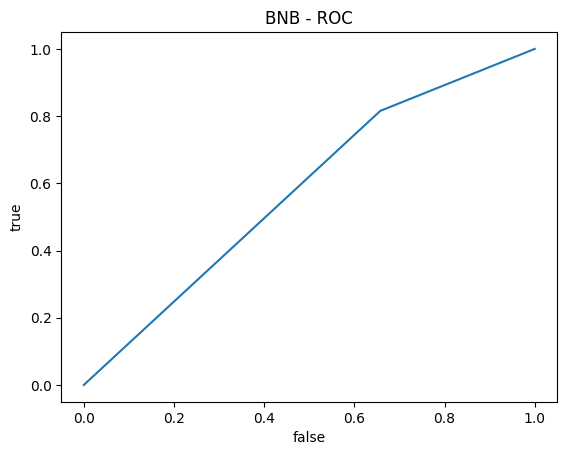


BNB - AUC: 0.5790431026634679


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing BNB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('BNB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nBNB - AUC:", A_Diabet)

In [ ]:
Early_DiabetP = { 'max_depth':[1, 2, 3],'criterion': ['gini','entropy','log_loss'],'bootstrap':[True,False]}
Mdl_EarlyDiabet = EarlyRFC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyRFC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 3}


RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=3)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     16975
           1       0.87      0.94      0.90     17081

    accuracy                           0.90     34056
   macro avg       0.90      0.90      0.90     34056
weighted avg       0.90      0.90      0.90     34056



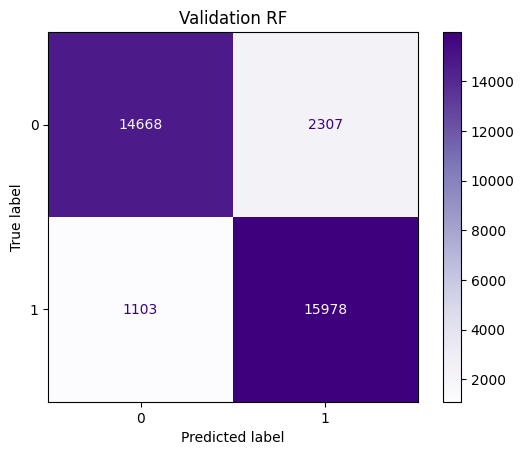

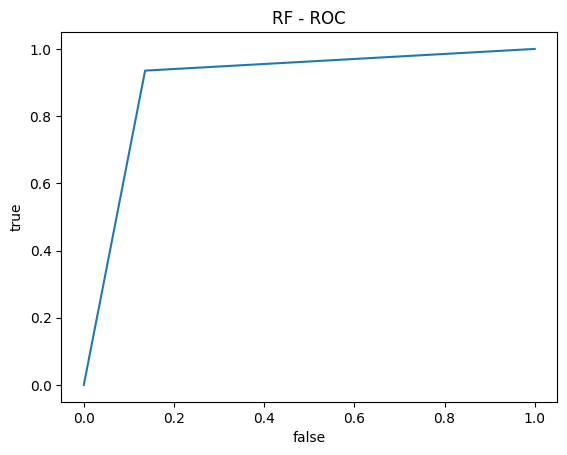


RF - AUC: 0.8997597913226238


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('RF - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.93      0.86      0.90     16983
           1       0.87      0.93      0.90     17074

    accuracy                           0.90     34057
   macro avg       0.90      0.90      0.90     34057
weighted avg       0.90      0.90      0.90     34057



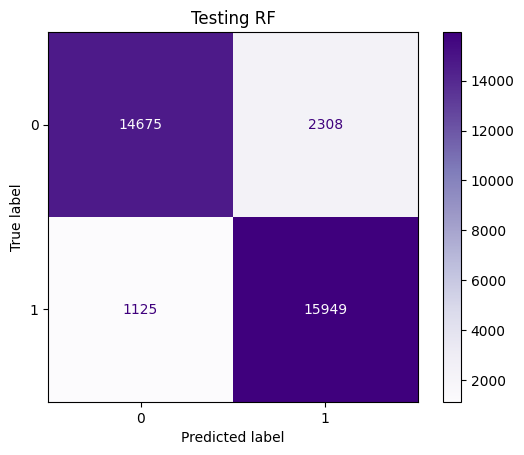

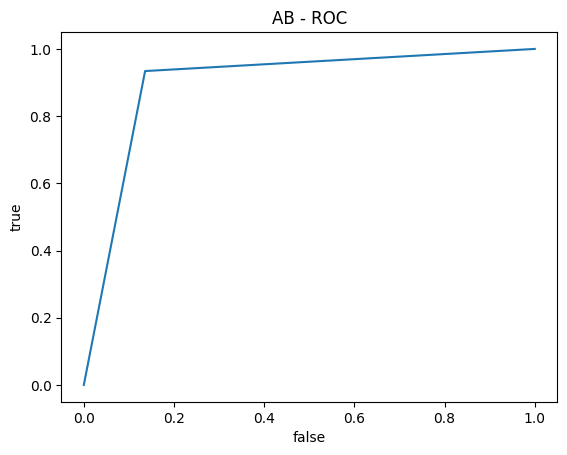


RF - AUC: 0.8991048683615297


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing RF")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nRF - AUC:", A_Diabet)

In [ ]:
Early_DiabetP = {'criterion':['gini','log_loss', 'entropy'],'max_depth': [1, 2, 3]}
Mdl_EarlyDiabet = EarlyETC(random_state=7)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyETC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'criterion': 'gini', 'max_depth': 3}


ExtraTreesClassifier(max_depth=3)

              precision    recall  f1-score   support

           0       0.90      0.87      0.88     16975
           1       0.87      0.90      0.89     17081

    accuracy                           0.88     34056
   macro avg       0.88      0.88      0.88     34056
weighted avg       0.88      0.88      0.88     34056



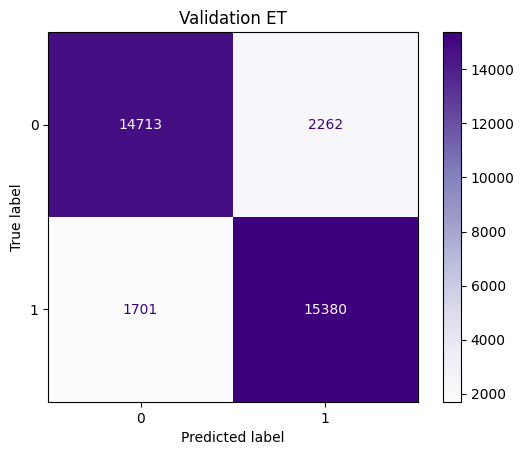

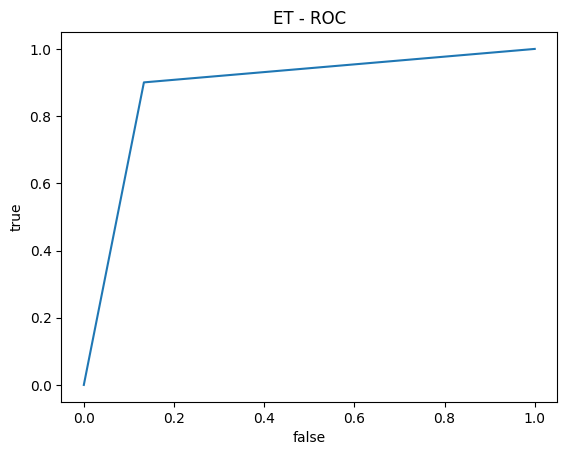


ET - AUC: 0.8835804400396999


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     16983
           1       0.87      0.90      0.89     17074

    accuracy                           0.88     34057
   macro avg       0.88      0.88      0.88     34057
weighted avg       0.88      0.88      0.88     34057



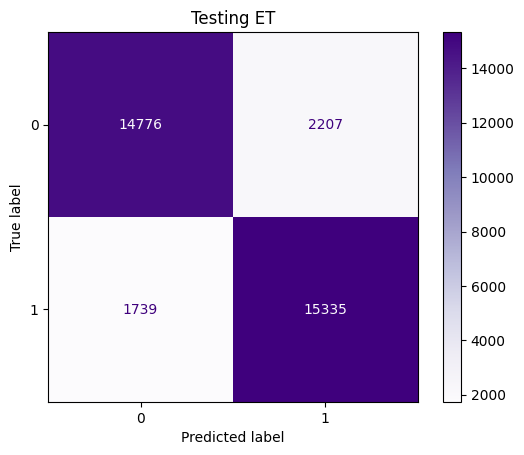

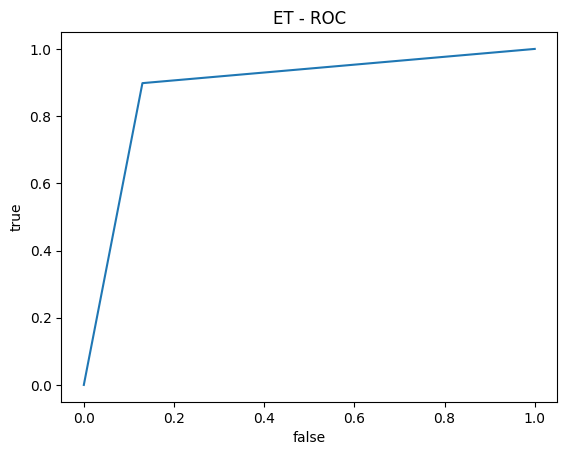


ET - AUC: 0.8840978749284464


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing ET")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('ET - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nET - AUC:", A_Diabet)

In [ ]:
Early_DiabetP = { 'loss':['log_loss', 'exponential'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyGBCL(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyGBCL(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 170}


GradientBoostingClassifier(learning_rate=0.5, loss='exponential',
                           n_estimators=170)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     16983
           1       0.99      0.95      0.97     17074

    accuracy                           0.97     34057
   macro avg       0.97      0.97      0.97     34057
weighted avg       0.97      0.97      0.97     34057



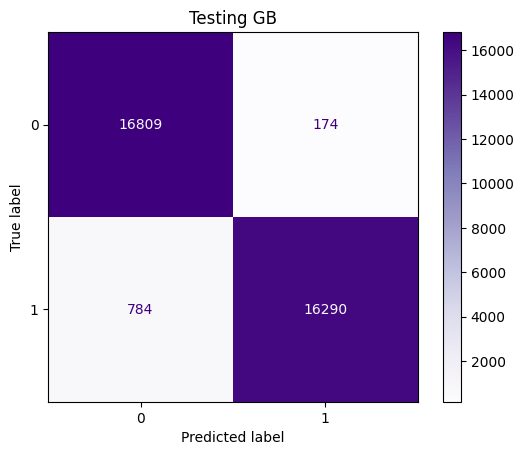

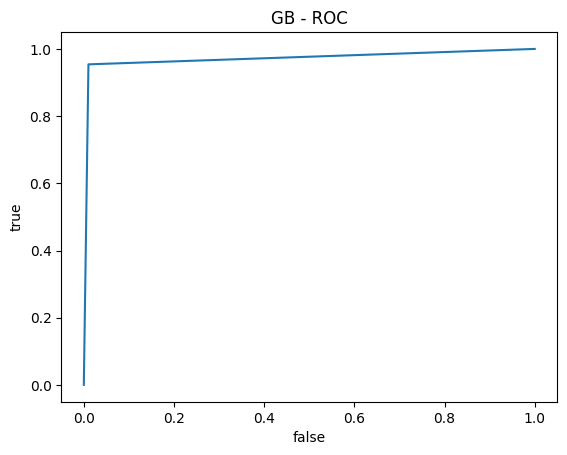


GB - AUC: 0.9719183453171837


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing GB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('GB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nGB - AUC:", A_Diabet)

In [ ]:
Early_DiabetP = { 'algorithm':['SAMME', 'SAMME.R'],'learning_rate': [1.0, 0.3, 0.5],'n_estimators':[100, 140, 170]}
Mdl_EarlyDiabet = EarlyABC(random_state=11)
Mdl_EarlyDiabet = EarlyGrid(Mdl_EarlyDiabet, Early_DiabetP, cv=2)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet[:1100], yt_EarlyDiabet[:1100])
print(Mdl_EarlyDiabet.best_params_)

Mdl_EarlyDiabet = EarlyABC(**Mdl_EarlyDiabet.best_params_)
Mdl_EarlyDiabet.fit(Xt_EarlyDiabet, yt_EarlyDiabet)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 140}


AdaBoostClassifier(n_estimators=140)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97     16975
           1       0.98      0.95      0.96     17081

    accuracy                           0.97     34056
   macro avg       0.97      0.97      0.97     34056
weighted avg       0.97      0.97      0.97     34056



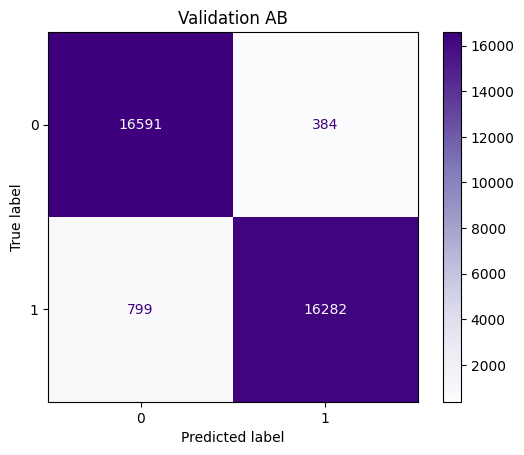

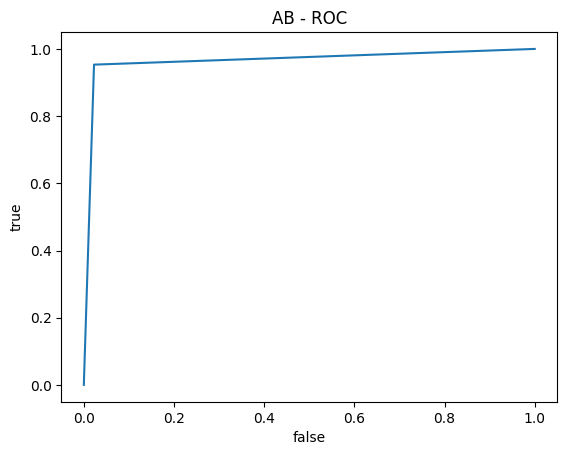


AB - AUC: 0.9653006885066984


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xv_EarlyDiabet)
print(EarlyCre(yv_EarlyDiabet, yprd_EarlyDiabet))

Mat_EarlyDiabet = EarlyMatx(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Validation AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(yv_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(yv_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     16983
           1       0.98      0.95      0.96     17074

    accuracy                           0.96     34057
   macro avg       0.96      0.96      0.96     34057
weighted avg       0.96      0.96      0.96     34057



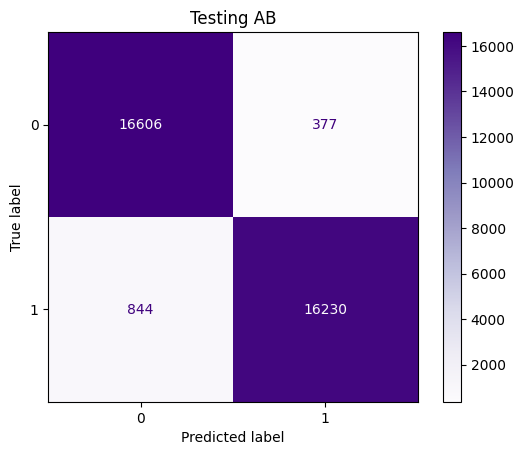

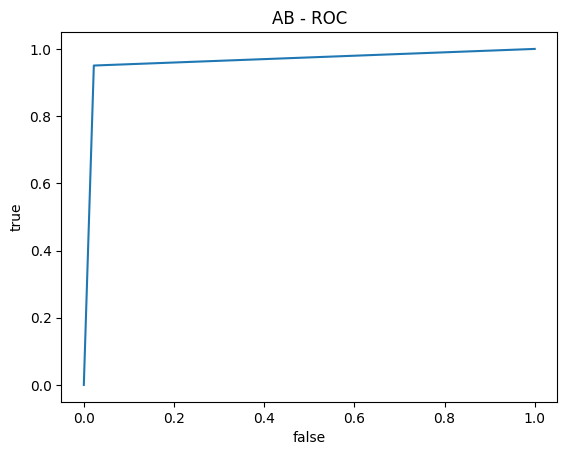


AB - AUC: 0.9641847230027402


In [ ]:
yprd_EarlyDiabet = Mdl_EarlyDiabet.predict(Xs_EarlyDiabet)
print(EarlyCre(ys_EarlyDiabet, yprd_EarlyDiabet[:34057]))

Mat_EarlyDiabet = EarlyMatx(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyMatxdis(confusion_matrix = Mat_EarlyDiabet, display_labels = [0, 1]).plot(cmap='Purples')
EarlyPlot.title("Testing AB")
EarlyPlot.show()

Dfp, Dtp, Dthres = EarlyMet.roc_curve(ys_EarlyDiabet, yprd_EarlyDiabet)
EarlyPlot.plot(Dfp,Dtp)
EarlyPlot.xlabel('false')
EarlyPlot.ylabel('true')
EarlyPlot.title('AB - ROC')
EarlyPlot.show()

A_Diabet = EarlyMet.roc_auc_score(ys_EarlyDiabet, yprd_EarlyDiabet)
print("\nAB - AUC:", A_Diabet)